Here is a matrix with both lower and upper bandwidth equal to one. Such a matrix is called *tridiagonal*. The `spdiagm` command creates a sparse matrix given its diagonal elements. The main or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [1]:
using SparseArrays

n = 50;
A = spdiagm(-3=>fill(n,n-3),0=>ones(n),1=>-(1:n-1))

Matrix( A[1:7,1:7] )

7×7 Array{Float64,2}:
  1.0  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -3.0   0.0   0.0   0.0
 50.0   0.0   0.0   1.0  -4.0   0.0   0.0
  0.0  50.0   0.0   0.0   1.0  -5.0   0.0
  0.0   0.0  50.0   0.0   0.0   1.0  -6.0
  0.0   0.0   0.0  50.0   0.0   0.0   1.0

Without pivoting, the LU factors have the same lower and upper bandwidth as the orignal matrix. 

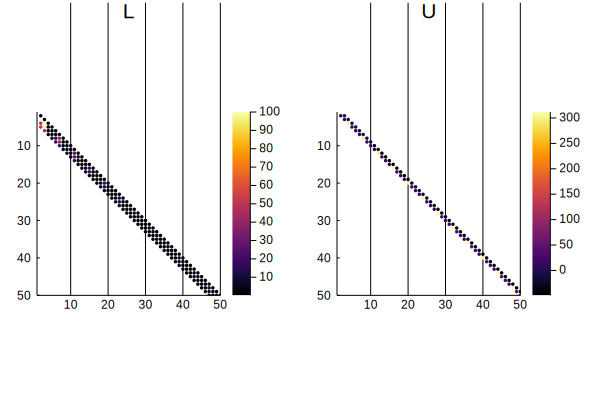

In [2]:
include("../FNC.jl")

L,U = FNC.lufact(A)

using Plots
spy(sparse(L),layout=2,subplot=1,markersize=2,title="L")
spy!(sparse(U),layout=2,subplot=2,markersize=2,title="U")

However, if we introduce row pivoting, bandedness may be expanded or destroyed.

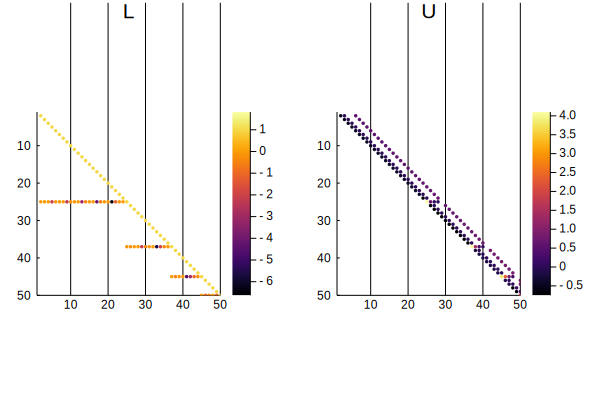

In [3]:
using LinearAlgebra
fact = lu(A)

spy(sparse(fact.L),layout=2,subplot=1,markersize=2,title="L")
spy!(sparse(fact.U),layout=2,subplot=2,markersize=2,title="U")